<a href="https://colab.research.google.com/github/sachong/ML/blob/main/openCV_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing cv2

In [ ]:

# These imports let you use opencv
import cv2 #opencv itself
#import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook



#Installing Darknet

In [ ]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 12.27 MiB/s, done.
Resolving deltas: 100% (3931/3931), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
In file included from /usr/include/string.h:495,
                 from ./src/utils.c:3:
In function ‘strncpy’,
    inlined from ‘copy_string’ at ./src/utils.c:426:5:
/usr/include/x86_64-linux-gnu/bits/string_fortified.h:106:10: warning: ‘__builtin_strncpy’ specified bound depends on the length of the source argument [-Wstringop-overflow=]
  106 |   return __builtin___strncpy_chk (__dest, __src, __len, __bos (__dest));
      |          ^

In [ ]:
!./darknet

usage: ./darknet <function>


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-02-22 21:12:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   104MB/s    in 2.3s    

2023-02-22 21:12:30 (104 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



#Multiple Images
Instead of supplying an image on the command line, you can leave it blank to try multiple images in a row. Instead you will see a prompt when the config and weights are done loading:

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [ ]:
import matplotlib.pyplot as plt
import scipy.misc
from zipfile import ZipFile
from io import BytesIO

# Image manipulation.
import PIL.Image
from IPython.display import display

In [ ]:
def load_image_blackandwhite(DroneImage):
    #image = PIL.Image.open(filename)

    image = PIL.Image.open(DroneImage) # open colour image
    image = np.array(image)
    
    return np.float32(image)

In [ ]:
def plot_image(image):
    
    # Convert the pixel-values to the range between 0.0 and 1.0
    image = np.clip(image/255.0, 0.0, 1.0)
   
    # Plot using matplotlib.
    plt.imshow(image)
    plt.show()

In [ ]:
dronefiles = ZipFile("/content/DroneImages.zip", 'r')
dronefiles.namelist()[:]

['DroneImages/{0151DDD8-194C-46F0-9E2F-66BAFC8CCD1C}.png',
 'DroneImages/{0E853267-90D6-448D-8253-24BA8BF04D69}.png',
 'DroneImages/{29502739-BE5C-4563-8D46-68DCEDCDDEC7}.png',
 'DroneImages/{304DEB55-B4EC-40D1-92B6-F6D21616831D}.png',
 'DroneImages/{4230A839-C0C2-4A5C-A524-D4277D71449D}.png',
 'DroneImages/{475E793A-77D6-4EC5-AC3D-6BFD9A3D5865}.png',
 'DroneImages/{48F20CC7-DDB2-4B99-87FB-AC9B431701EF}.png',
 'DroneImages/{60CCBFBC-83A7-4F0C-B6F6-DCCC2C788600}.png',
 'DroneImages/{65F60F76-4688-4CCB-9044-DB73F8A3ECE0}.png',
 'DroneImages/{708CE5CA-3190-43E4-8A91-45101D8685C4}.png',
 'DroneImages/{722FB9BE-A980-4A9F-8505-DE9AE5324824}.png',
 'DroneImages/{8E4DEB40-2EFE-4550-96BD-54E5CDEE120B}.png',
 'DroneImages/{993B858F-10BB-40C9-BFC5-C3B225D946C1}.png',
 'DroneImages/{AC7AE467-84D6-4565-9C65-4B50D4A2CB4D}.png',
 'DroneImages/{BEAA746C-85D7-4F06-9DCC-35FDD8326E85}.png',
 'DroneImages/{CC4C2956-D887-4426-94D7-58A74804AC8B}.png',
 'DroneImages/{CE6382F5-6277-4B89-8573-F87A359381ED}.png

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/{29502739-BE5C-4563-8D46-68DCEDCDDEC7}.png

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

#Testing the webcam script

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


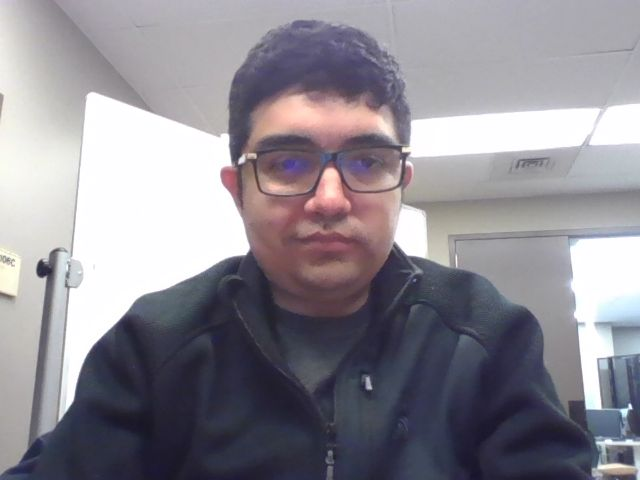

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#Checking CUDA on colab
First) Go to Menu > Runtime > Change runtime


In [ ]:
!nvidia-smi

Thu Feb 16 01:50:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |    792MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Check if torch can use the GP
import torch
torch.cuda.is_available()
#output - True

True

In [ ]:
#Check if tensor can use gpu
import tensorflow as tf
tf.test.gpu_device_name()
#output -  /device:GPU:0

'/device:GPU:0'

In [ ]:
!./darknet imtest data/eagle.jpg

L2 Norm: 371.979095
Not compiled with OpenCV, saving to Original.png instead
Not compiled with OpenCV, saving to Gray.png instead
Not compiled with OpenCV, saving to C1.png instead
Not compiled with OpenCV, saving to C2.png instead
Not compiled with OpenCV, saving to C3.png instead
Not compiled with OpenCV, saving to C4.png instead
